In [5]:
!pip install kaggle -q
!pip install wordcloud


In [6]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
kaggle_config = json.load(open("kaggle.json"))

In [9]:
kaggle_config.keys()


dict_keys(['username', 'key'])

In [10]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [11]:
# loadig the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0




  0%|          | 0.00/20.7M [00:00<?, ?B/s]
100%|██████████| 20.7M/20.7M [00:00<00:00, 1.13GB/s]


In [12]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [15]:
data = pd.read_csv("spotify_millsongdata.csv")

In [16]:
data.shape

(57650, 4)

In [17]:
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [19]:
data.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [20]:
top_artists = data['artist'].value_counts().head(10)
print('top 10 top_artists:')
print(top_artists)

top 10 top_artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [21]:
data = data.sample(10000)

data= data.drop('link', axis=1).reset_index(drop=True)


In [22]:
data.shape

(10000, 3)

In [23]:
data.head()

,artist,song,text
0,Santana,One Chain (Don't Make No Prison),Just because in a moment of madness \r\nI too...
1,Nickelback,Hollywood,Please don't be too long while you're gone \r...
2,Manowar,Hymn Of The Immortal Warriors,A hero was he \r\nTouching all our lives \r\...
3,Lloyd Cole,To The Church,I'm looking for a religious girl \r\nWith chi...
4,The Jam,DON'T TELL THEM YOU'RE SANE,A boy I know is sick in his head \r\nAt least...


In [24]:
all_lyrics = " ".join(data['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

word cloud to visuilaize the most common words.

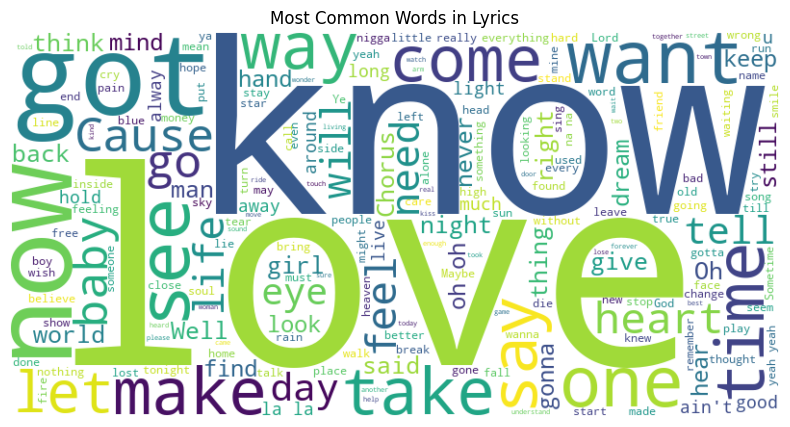

In [25]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [32]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
stop_words = set(stopwords.words('english'))

In [35]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [37]:
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [49]:
data

,artist,song,text,cleaned_text
0,Joy Division,New Dawn Fades,"A change of speed, a change of style. \r\nA c...",change speed change style change scene regrets...
1,Bruce Springsteen,I'm A Rocker,I got a 007 watch and it's a one and only \r\...,got watch one got ispy beeper tells youre lone...
2,Ufo,Miss The Lights,"(intro) walking tall, full of tedious charm, ...",intro walking tall full tedious charm smoothes...
3,The Monkees,Carlisle Wheeling,In a long and involved conversation with mysel...,long involved conversation saw precious thing ...
4,Dolly Parton,I Don't Believe You've Met My Baby,"Last night, my tears they were fallin' \r\nI ...",last night tears fallin went bed sad blue drea...
...,...,...,...,...
9995,Regine Velasquez,True Romance,Just one glance and I never had a chance \r\n...,one glance never chance knew id fall love know...
9996,Queen,Rain Must Fall,I can see it in your stars \r\nLife is so exc...,see stars life exciting acting bizarre world i...
9997,Christy Moore,Shine On You Crazy Diamond,Remember when you were young \r\nYou shone li...,remember young shone like sun shine crazy diam...
9998,Xzibit,Hey Now,"I'm a menace, to society baby \r\nThe police ...",im menace society baby police want relocate ru...


In [40]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [41]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


Recommondation function



In [45]:
def recommend_songs(song_name, cosine_sim=cosine_sim, data=data, top_n=5):
    idx = data[data['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"
    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    song_indices = [i[0] for i in sim_scores]

    return data[['artist', 'song']].iloc[song_indices]

In [51]:
data["song"][3]



'Carlisle Wheeling'

In [52]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("Carlisle Wheeling")
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
             artist                              song
1247      Aerosmith                          Remember
5229          Adele                        First Love
7266    Rod Stewart                          Lady Day
9850  Irving Berlin                          Remember
4716  Wanda Jackson  Have I Grown Used To Missing You
